# Explorando la base de datos del grupo @Natura

En este cuaderno vamos a abrir y explorar en que consiste la base de datos.

Para ello vamos a importar pandas, matplotlib y signal.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

La base de datos, que se encuentra en el archivo "MicSigV1_v1_1.json", fue creada por el Instituto Geofísico de la Escuela Politécnica Nacional de Ecuador y cuenta con un catálogo de diferentes eventos sísmicos registrados en el volcán Cotopaxi. 

Solo tenemos permisos para su uso por lo que no podemos compartir el archivo con terceros.

Vamos a leerlo.

In [3]:
json_file = './dataset/MicSigV1_v1_1.json'
df = pd.read_json(json_file)
df.head()

,Network,Station,SampleRate,Component,Year,Month,Type,Duration,StartPoint,EndPoint,Data
0,EC,VC1,100,SHZ,2012,1,VT,23,1001,3301,"[23.355529956093186, -26.21249638722304, 7.478..."
1,EC,VC1,100,SHZ,2012,1,LP,47,1001,5701,"[-9.39456702711197, 5.797439374378022, -23.901..."
2,EC,VC1,100,SHZ,2012,1,LP,56,1001,6601,"[-3.915706523024276, 0.420532668769778, -21.37..."
3,EC,VC1,100,SHZ,2012,1,VT,49,1001,5901,"[-2.5686254658527723, 23.91770870655175, -10.7..."
4,EC,VC1,100,SHZ,2012,1,VT,31,1001,4101,"[55.05791051352128, 41.33929940327658, -19.424..."


Network: la red sísmica;

Station: el nombre de la estación sísmica; 

SampleRate: el tiempo de muestreo del digitalizador; 

Component es un conjunto de tres letras cuya última establece la dirección de medición. En este caso, Z es la dirección vertical del movimienti.

Type: el tipo de evento sísmico

StartPoint y EndPoint hace referencia al inicio y final del evento en la serie temporal que se encuentra en Data.

# Los eventos sísmicos

In [26]:
types = df['Type']
print('Nro. de eventos totales: ', len(df['Type']))
types.value_counts()

Nro. de eventos totales:  1187


LP          1044
VT           101
REGIONAL      27
HB             8
ICEQUAKE       7
Name: Type, dtype: int64

### Cada evento sísmico refleja un proceso de fuente diferente. Los VT son consecuencia de la ruptura frágil de la corteza, mientras que los LPs se debe a la agitación de un sistema que involucra fluido (ya sea fundido o agua).

(0.0, 10.0)

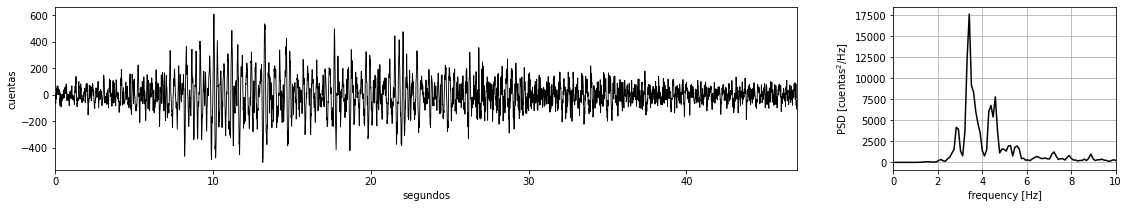

In [35]:
# representamos gráficament un LP
LPs = df[types == 'LP']
nro_LP = len(LPs)
LP1 = LPs.iloc[0]

# forma de onda
LP_waveform = LP1.Data[LP1.StartPoint:LP1.EndPoint]
N_points = len(LP_waveform)
time = np.linspace(0, LP1.Duration, N_points)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 3), gridspec_kw=dict(width_ratios=[10,3]))
ax1.plot(time, LP_waveform, 'k', lw=0.9)
ax1.set_ylabel('cuentas')
ax1.set_xlabel('segundos')
ax1.set_xlim(0, LP1.Duration)

# PSD
f, PSD = signal.welch(LP_waveform, LP1.SampleRate, nperseg=1024, scaling='density')
ax2.plot(f, PSD, color='k')
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel(r'PSD [cuentas$^2$/Hz]')
ax2.grid()
ax2.set_xlim(0, 10)

# Planteando el problema

No todas las señales LP son iguales

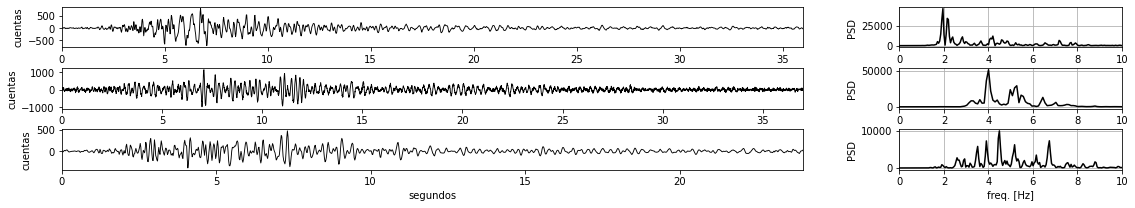

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(19, 3), gridspec_kw=dict(width_ratios=[10,3], hspace=0.5))
for k in range(3):
    LP_k = LPs.iloc[np.random.randint(0, 1044)]
    LP_waveform = LP_k.Data[LP_k.StartPoint:LP_k.EndPoint]
    N_points = len(LP_waveform)
    time = np.linspace(0, LP_k.Duration, N_points)
    axes[k][0].plot(time, LP_waveform, 'k', lw=0.9)
    axes[k][0].set_ylabel('cuentas')
    axes[k][0].set_xlabel('segundos')
    axes[k][0].set_xlim(0, LP_k.Duration)

    nps = 1024
    if N_points < nps:
        nps = 512

    f, PSD = signal.welch(LP_waveform, LP_k.SampleRate, nperseg=nps, scaling='density')
    axes[k][1].plot(f, PSD, color='k')
    axes[k][1].set_xlabel('freq. [Hz]')
    axes[k][1].set_ylabel(r'PSD')
    axes[k][1].grid()
    axes[k][1].set_xlim(0, 10)

# El objetivo del proyecto es: 

## diseñar un algortimo no-supervisado o semisupervisado a partir de features extraidos de las señales capaz de clasificar estos LP en subcategorias o subtipos